In [1]:
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<6):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    raise ValueError("path_pipest not found. Instead: {}".format(path_pipest))
path_sdhawkes=path_pipest+'/sdhawkes_powerlaw'
path_lobster=path_pipest+'/lobster_for_sdhawkes'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_models=path_pipest+'/models'
path_tests=path_pipest+'/tests'
path_saved_tests=path_tests+'/saved_tests'

In [2]:
import time
import sys
sys.path.append(path_sdhawkes+'/resources/')
sys.path.append(path_sdhawkes+'/modelling/')
sys.path.append(path_lobster_pyscripts+'/')

In [3]:
import pickle
import numpy as np
import pandas as pd

In [4]:
import model as sd_hawkes_model
import lob_model
import computation
import simulation
import goodness_of_fit
import mle_estimation as mle_estim

openmp.omp_get_max_threads(): 4
openmp.omp_get_max_threads(): 4


In [5]:
symbol = "INTC"
date = "2019-01-04"
time_window = "36000-39000"

In [6]:
try:
    with open(path_models+'/{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date, time_window),'rb') as source:
        model=pickle.load(source)
except:
    with open(path_models+'/{}/{}_{}_{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date, time_window, symbol, date, time_window),'rb') as source:
        model=pickle.load(source)
print(model.name_of_model)
print('Date and time of initilisation: {}'.format(model.datetime_of_initialisation))
print('number_of_event_types: {}; number_of_states: {}'.format(
    model.number_of_event_types, model.number_of_states))
print('Dimension of dataset: {}'.format((model.data.messagefile.shape)))

/home/claudio/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/claudio/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Ridge from version 0.21.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


INTC_sdhawkes_2019-01-04_36000-39000
Date and time of initilisation: 2020-04-18 09:16:15.896253
number_of_event_types: 4; number_of_states: 15
Dimension of dataset: (207003, 10)


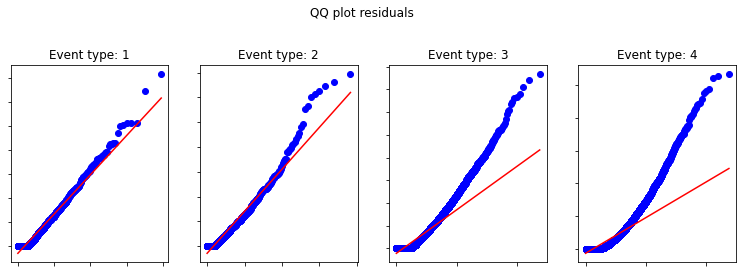

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.922 1.078 1.341 1.605 1.956]
event type=0, ad_stat: 2026.1762122328719
event type=1, ad_stat: 900.4671142306256
event type=2, ad_stat: 179999.27097785455
event type=3, ad_stat: 218416.20248227502
None


In [7]:
model.mle_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.mle_estim.goodness_of_fit.ad_test_on_residuals())

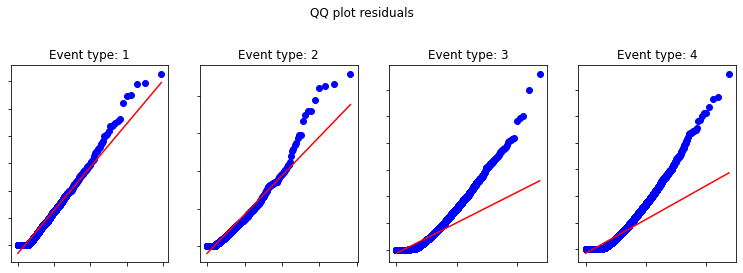

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.922 1.078 1.341 1.605 1.956]
event type=0, ad_stat: 2105.0539725698522
event type=1, ad_stat: 936.2287088627422
event type=2, ad_stat: 240374.20010088454
event type=3, ad_stat: 232581.60804628034
None


In [8]:
model.nonparam_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.nonparam_estim.goodness_of_fit.ad_test_on_residuals())

In [9]:
# minim=model.mle_estim.results_of_estimation[3].get("MinimisationProcedure")
# minim.results

In [10]:
print(model.mle_estim.base_rates)
# print(model.base_rates)

[  0.6138412    0.56271248  31.58725727 130.86459926]


In [11]:
# model.mle_estim.dirichlet_param

In [12]:
# model.impact_coefficients

In [14]:
e1=0
e=0
model.decay_coefficients[e1,:,e]

array([1.00997839, 1.0096356 , 1.00313311, 1.0097249 , 1.01      ,
       1.00985982, 1.6650788 , 1.02112234, 2.42253248, 1.00998564,
       1.01      , 1.01      , 1.00999808, 4.06431955, 1.01      ])

In [15]:
model.impact_decay_ratios[e1,:,e]

array([2.93928183e-01, 1.03781827e-05, 1.70024174e+00, 2.38627629e-01,
       1.00000002e-05, 1.01421745e-05, 4.18859270e-01, 3.48793398e+00,
       8.94893318e-02, 1.33551982e+00, 2.40023249e-01, 1.00000001e-05,
       3.96176834e-01, 3.89211485e-03, 1.71610194e-01])

In [16]:
np.amin(model.decay_coefficients)

1.0001

In [17]:
np.amax(model.impact_decay_ratios)

650.3550209628012